# HiFormer

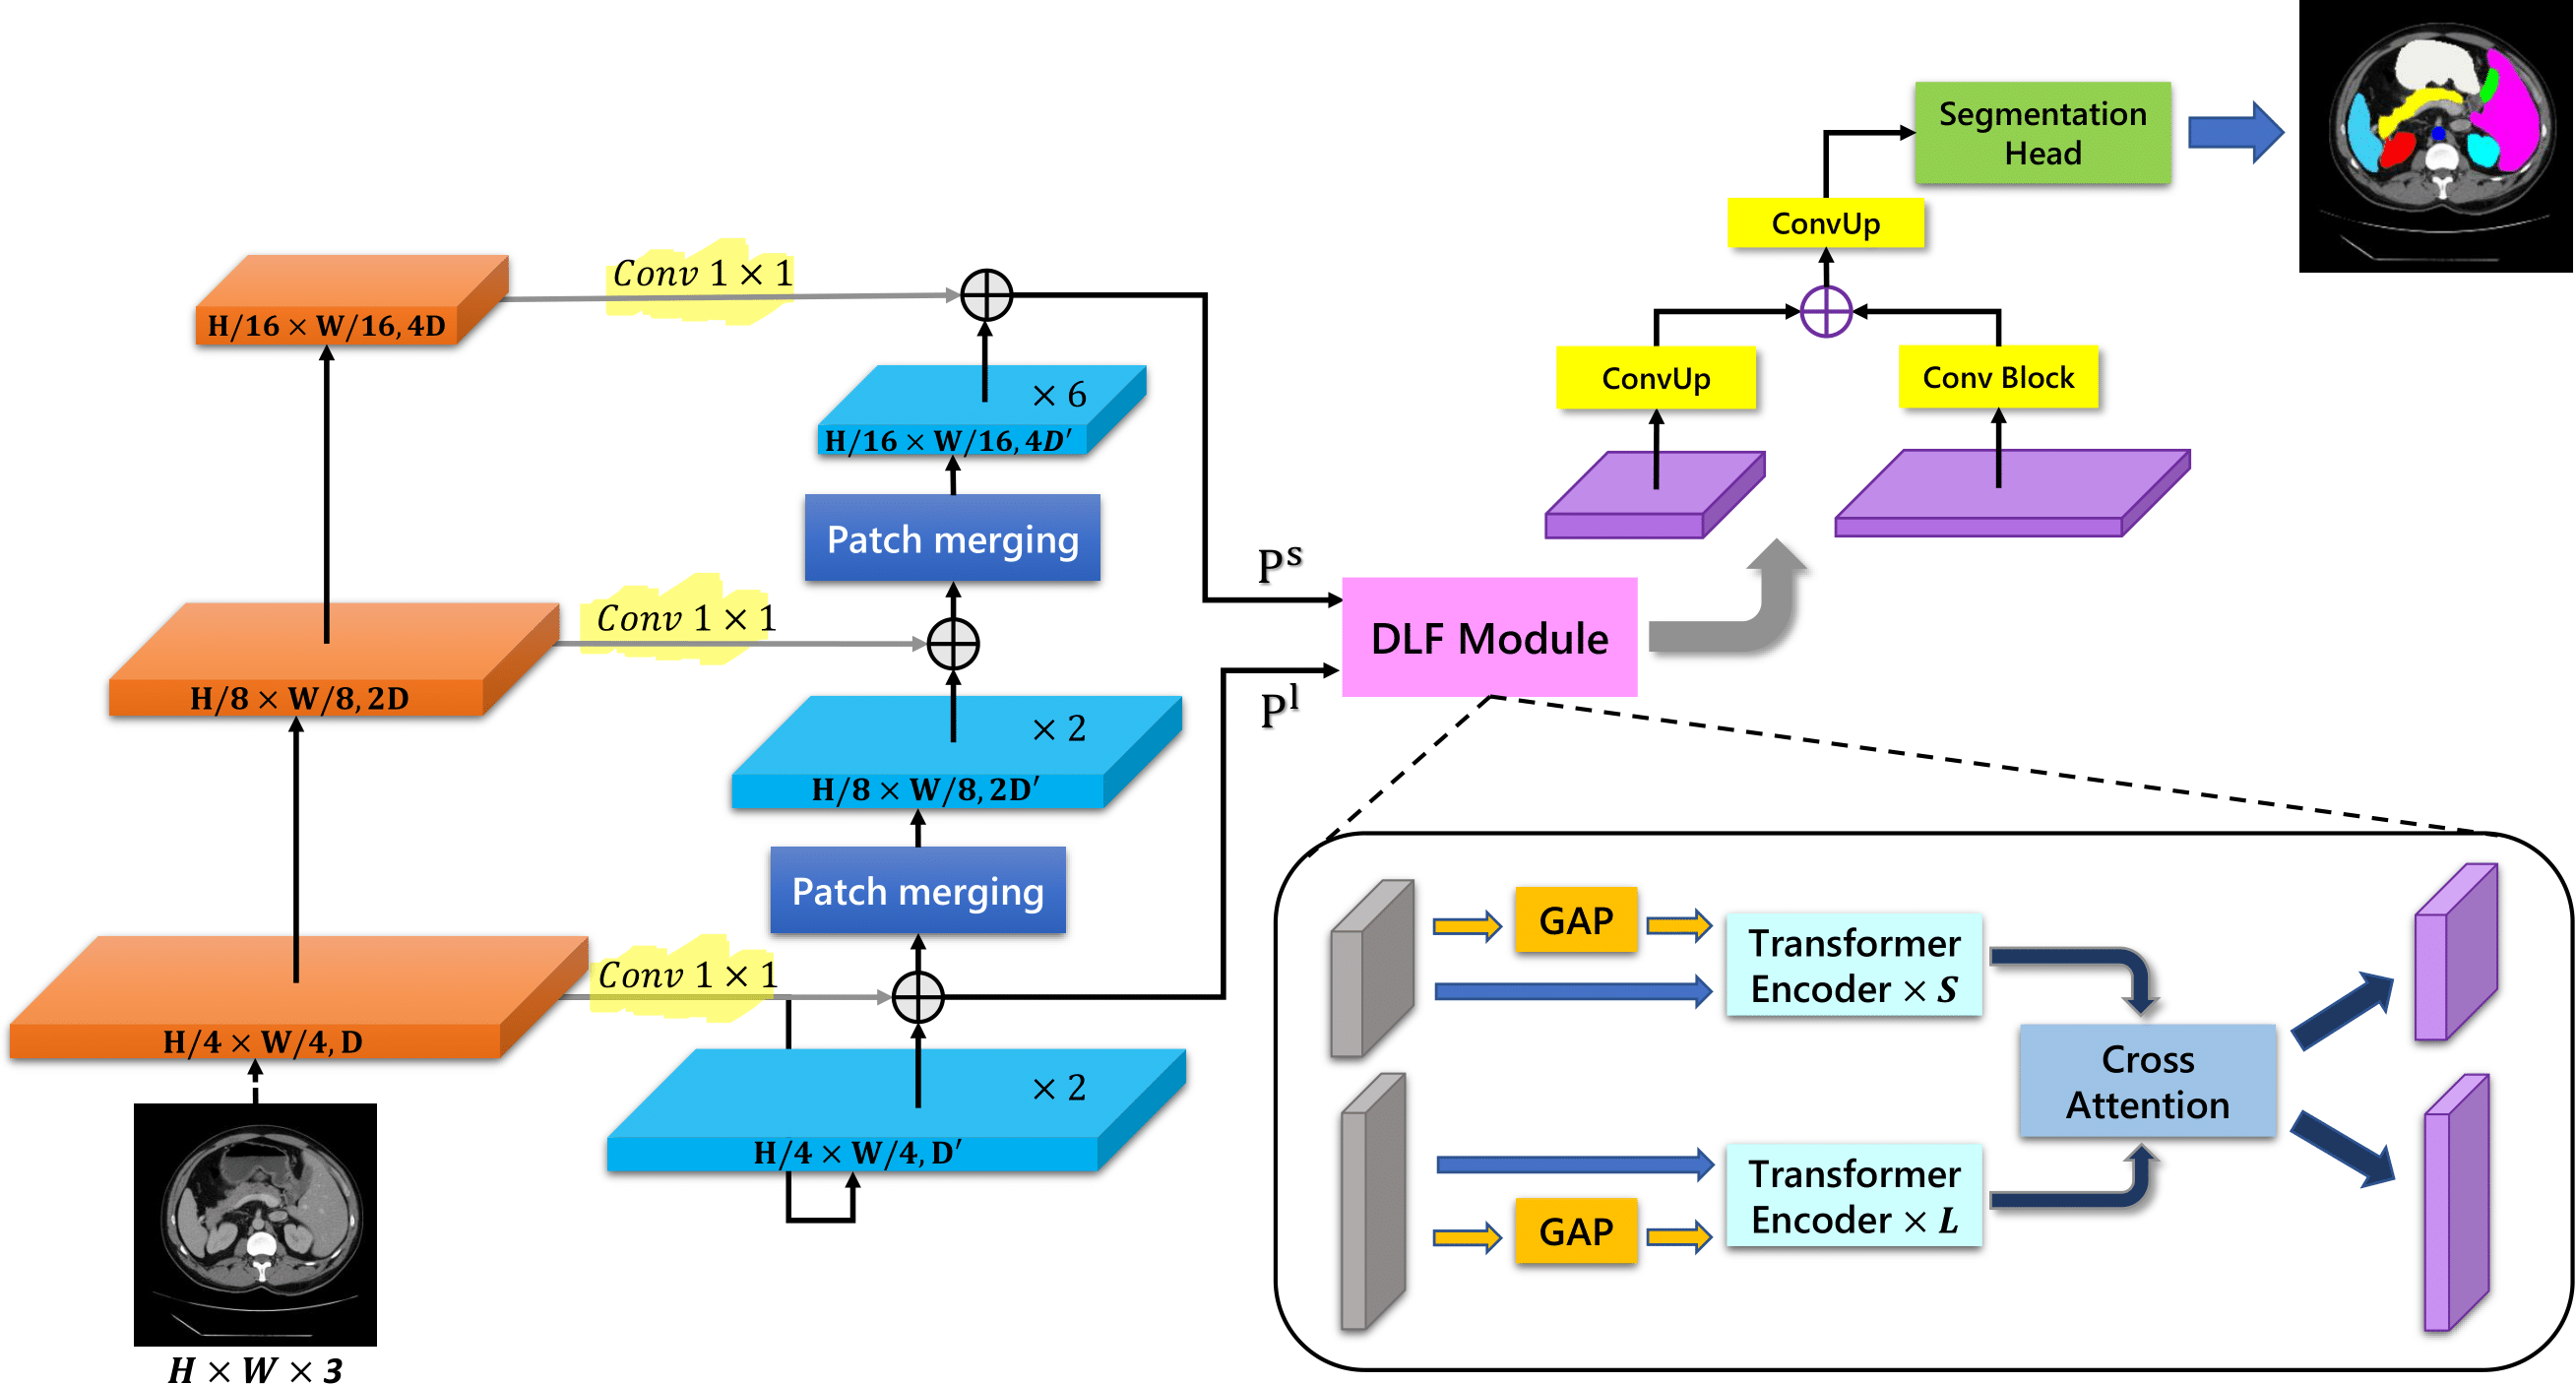

## 1)  Clone the repository and download the Synapse dataset

In [ ]:
!git clone https://github.com/amirhossein-kz/HiFormer.git
%cd /content/HiFormer

In [ ]:
!gdown 18I9JHH_i0uuEDg-N6d7bfMdf7Ut6bhBi
!unzip -xq ./data.zip

## 2) Install Prerequisites

In [ ]:
!pip install -r requirements.txt

## 3) Train Code

- **--root_path**     [Train data path]
- **--test_path**     [Test data path]
- **--eval_interval** [Evaluation epoch]
- **--model_name**    [Choose from [hiformer-s, hiformer-b, hiformer-l]]

In [ ]:
!python train.py --root_path ./data/Synapse/train_npz --test_path ./data/Synapse/test_vol_h5 --batch_size 10 --eval_interval 20 --max_epochs 400 --model_name hiformer-b --num_workers 2

## 3) Test Code

- **--test_path**     [Test data path]
- **--model_name**    [Choose from [hiformer-s, hiformer-b, hiformer-l]]
- **--is_savenii**    [Whether to save results during inference]
- **--model_weight**  [HiFormer trained model path]

In [ ]:
!python test.py --test_path ./data/Synapse/test_vol_h5 --model_name hiformer-b --is_savenii --model_weight './results/hiformer-b/hiformer-b_best.pth'